In [224]:
import numpy as np
import matplotlib.pyplot as plt

In [225]:
def twoPointDerivative(func, dt):
    derivative = np.zeros_like(func)
    for i in range(1, len(derivative) - 1):
        derivative[i] = (func[i + 1] - func[i - 1]) / (2 * dt)
    return derivative

# Вариант 9

### Задание 1

$f_1(t) = \cos^2(20 \pi t) + \sin(10 \pi t)$

$f_2(t) = t^2 + 0.5 t$

Производная

$f_1'(t) = 2 \cos(20 \pi t)(-\sin(20 \pi t))\cdot 20 \pi + 10\pi\cos(10 \pi t) = - 20 \pi \sin(40 \pi t)+ 10\pi\cos(10 \pi t)$

$f_2'(t) = 2t + 0.5$

### Задание 2

Для функции 1 зададим промежуток, чтобы уложилось несколько периодов (будем считать по функции с наименьшей частотой):

Период $T = \dfrac{2 \pi}{\omega} = 0.2$, тогда возьмём, например, четыре периода

In [226]:
T = 0.2
time_ax = np.linspace(0, 8 * T, 700)

In [227]:
f_1 = lambda t : (np.cos(20 * np.pi * t)) ** 2 + np.sin(10 * np.pi * t)

f_1_array = f_1(time_ax)

In [228]:
analytical_derivative = lambda t : 10 * np.pi * (np.cos(10 * np.pi * t) - 2 * np.sin(40 * np.pi * t))
analyt_deriv_array = analytical_derivative(time_ax)

### По двум точкам

In [229]:
new_derivative = np.zeros((len(f_1_array)))
dt = np.diff(time_ax)[0]
for i in range(1, len(new_derivative) - 1):
    new_derivative[i] = (f_1_array[i + 1] - f_1_array[i - 1]) / (2 * dt)


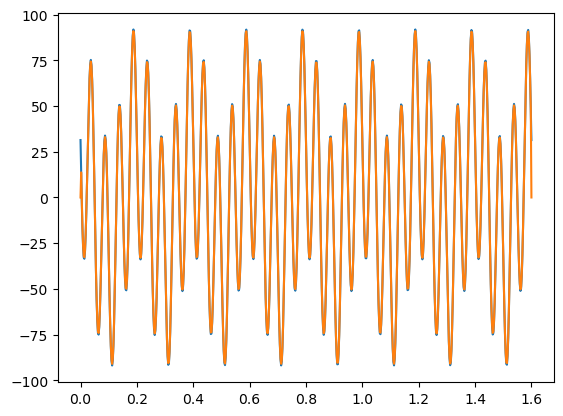

In [230]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, new_derivative)

### Через преобразование Фурье

In [231]:
f_1_fourier = np.fft.fft(f_1_array)
freq_array = 2 * np.pi * np.fft.fftfreq(len(f_1_array), dt)

fourier_derivative = np.fft.ifft(1j*freq_array*f_1_fourier)

c:\Users\roman\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


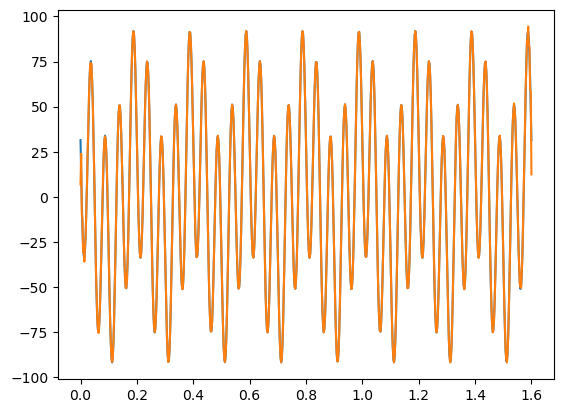

In [232]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, fourier_derivative)

### С шумом

In [279]:
sigma = 7e-2
noise = np.random.normal(0, sigma, len(time_ax))
f_1_noisy = f_1_array + noise

### По двум точкам

In [280]:
noisyDeriv = twoPointDerivative(f_1_noisy, dt)

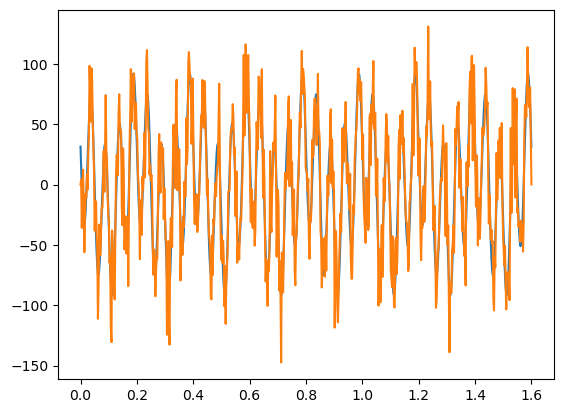

In [281]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, noisyDeriv)

In [282]:
rel_error = np.linalg.norm(analyt_deriv_array[1:len(analyt_deriv_array) - 1] - noisyDeriv[1:len(noisyDeriv)-1]) / np.linalg.norm(analyt_deriv_array[1:len(analyt_deriv_array)-1])
print(rel_error)

0.4460374350961446


In [293]:
window = np.zeros_like(f_1_array)
halfWidth = 100
for i in range(halfWidth):
    window[i] = 1
    window[-(i + 1)] = 1

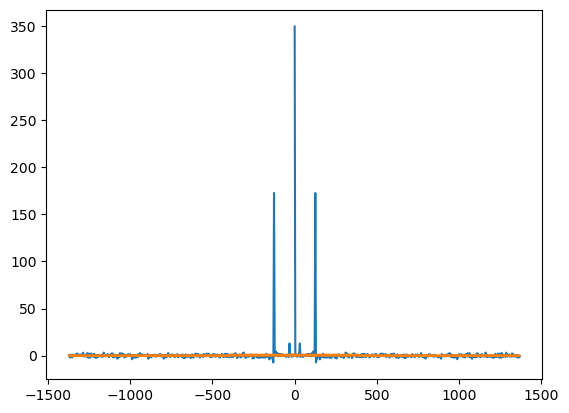

In [296]:
plt.plot(freq_array, np.fft.fft(f_1_noisy))
plt.plot(freq_array, window)
# plt.ylim(0,5)

In [295]:
def fourierDerivative(func, dt):
    ...
    